# Shelter Animal Outcomes 10

## Gradient Tree Boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../Shelter_train.csv')
df_test = pd.read_csv('../Shelter_test.csv')

In [3]:
x = df_train.ix[:, :-1]
y = df_train.ix[:, -1]
df_test = df_test.drop('ID', 1)

In [4]:
clf = GradientBoostingClassifier()
cross_validation.cross_val_score(clf, x, y, scoring="log_loss")

array([-0.95118442, -0.94772429, -0.93670389])

In [5]:
%timeit clf.fit(x, y)

1 loop, best of 3: 7.37 s per loop


In [6]:
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(y, 2),
              scoring='log_loss')
rfecv.fit(x, y)
X_r = rfecv.transform(x)

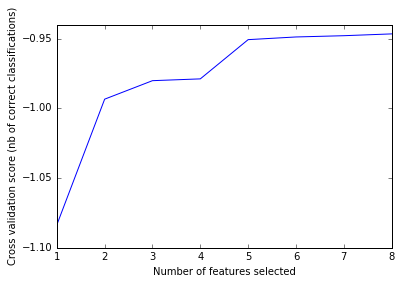

In [7]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [8]:
cross_validation.cross_val_score(clf, X_r, y, scoring="log_loss")

array([-0.9512381 , -0.94770944, -0.93670963])

In [9]:
clf = rfecv.fit(x, y)
predictions = clf.predict_proba(df_test)
output = pd.DataFrame(predictions, columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])
output.index.names = ['ID']
output.index += 1
output.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.080373,0.004817,0.082030,0.295864,0.536917
2,0.624881,0.002066,0.026119,0.246803,0.100130
3,0.652777,0.002695,0.045972,0.096427,0.202128
4,0.086301,0.004055,0.089044,0.361655,0.458946
5,0.521779,0.001196,0.022100,0.284509,0.170416


In [10]:
output.to_csv('../submission-GradientBoostingClassifier.2.0.csv', index_label = 'ID')